# RPC data

This is a subset of data obtained from the Rock Property Catalogue - https://subsurfwiki.org/wiki/Rock_Property_Catalog

## General description

The Rock Property Catalog is an online database of the petrophysical properties of rocks and minerals.

Most of them have VP, VS and  ρ. Many of them have Thomsen's parameters too. Most have a lithology, and they all have a reference.

All of the rocks have a reference, which is the canonical source of data for that rock. The data in the catalog were initially from two major sources:

* Mudrock Anisotropy database, aka Mr Anisotropy, a public domain database curated by Steve Horne. It contains over 1000 records of mudrocks, gathered from the literature.
 * Common Ground, a public domain database collected by John A. Scales, Hans Ecke and Mike Batzle at Colorado School of Mines in the late 1990s, is now defunct and has been officially discontinued. It contains over 4000 records, and is public domain.

The data have since been augmented by rocks from some other sources.

## Access

The RPC is a public database, with no authentication needed. The catalogue is queryable should you want a specific subset.

The subset being used for this project is available online from https://geocomp.s3.amazonaws.com/data/RPC_4_lithologies_Messy.csv

## License and reuse

The data is probably best described as public domain. This manifestation of the data is offered under the same CC-BY terms as the rest of SubSurfWiki. This means that Agile Geoscience is not responsible for what you do with the data, or for errors it contains. If also means you can use the data for whatever you want, without permission. Credit the original publisher of the data by citing it as you would any other scientific data.

---

## Contents

* [Loading Data](#loading)
* [Exploring our Data](#exploring)
* [Cleaning our Data](#cleaning)
    * [Redundant columns](#redundant)
    * [Fixing the Dates](#dates)
    * [Fixing the Lithology](#lithology)
    * [Fixing the Vs values](#vs_values)
    * [Fixing the Rho values](#rho_values)
    * [Remove duplicates](#duplicates)
    * [Removing `nan` values](#nan_values)
    * [Renaming our columns](#renaming)
* [Next Steps](#next)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

---

## Loading the dataset<a id='loading'></a>

In [2]:
url = 'https://geocomp.s3.amazonaws.com/data/RPC_4_lithologies_Messy.csv'
# url = './RPC_4_lithologies_Messy.csv' # this is a slightly different file to the above at the time of writing.
                                      # It is on slack in the spoiler thread, so grab it there. 
                                      # Most of this notebook will work with either version.
df = pd.read_csv(url)
df.head()

,Index,RPC,Source,YYYY-MM-DD,Description,Lithology,DTP [μs/ft],Vs [km/s],VpVs ratio,Rho [kg/m³]
0,63,104818,RPC,Sat 04 May 2002,KIAMICHI FORMA. 4,sandstone,-999.2500,1.5957,1.9086,2109.1206
1,64,104893,RPC,Thu 09 Aug 2012,KIAMICHI REMOLD 3,sandstone,101.5797,1.5171,1.9779,2090.3420
2,65,104652,RPC,2010-10-26,NAVAJO ARCO 2,SANDST.,90.6172,2.0415,1.6476,2131.9900
3,66,104752,RPC,Wed 01 Aug 2007,NAVAJO ARCO REMOL 1,SANDST.,95.3901,1.6062,1.9894,2184.9392
4,67,104598,RPC,2007-06-30,FERRON 82-3 1677.5,sandstone,71.9292,2.4486,1.7306,2472.2308


In [6]:
df.shape

(808, 10)

In [7]:
df.describe()

,Index,RPC,DTP [μs/ft],Vs [km/s],VpVs ratio,Rho [kg/m³]
count,808.000000,808.000000,808.000000,808.000000,808.000000,760.000000
mean,463.107673,102277.626238,34.308767,2.116353,1.887390,1656.815643
std,231.252250,1537.484250,237.790700,0.747915,0.377769,1029.026472
min,63.000000,100031.000000,-999.250000,0.441300,1.337600,2.262200
25%,262.750000,101112.750000,62.703750,1.527225,1.666075,2.666425
50%,462.500000,102083.500000,80.410850,2.202600,1.779850,2109.104250
75%,664.250000,103284.750000,99.818225,2.733000,1.943675,2422.384950
max,862.000000,105090.000000,204.466100,3.665000,4.707800,2823.287700


👀 There are missing values in DTP and Rho.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        808 non-null    int64  
 1   RPC          808 non-null    int64  
 2   Source       808 non-null    object 
 3   YYYY-MM-DD   808 non-null    object 
 4   Description  808 non-null    object 
 5   Lithology    808 non-null    object 
 6   DTP [μs/ft]  808 non-null    float64
 7   Vs [km/s]    808 non-null    float64
 8   VpVs ratio   808 non-null    float64
 9   Rho [kg/m³]  760 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 63.2+ KB


In [9]:
df.columns

Index(['Index', 'RPC', 'Source', 'YYYY-MM-DD', 'Description', 'Lithology',
       'DTP [μs/ft]', 'Vs [km/s]', 'VpVs ratio', 'Rho [kg/m³]'],
      dtype='object')

---

## Exploring our data<a id='exploring'></a>

### Column evaluation

Our DataFrame has the following columns:

* Index
* RPC Number
* Source
* YYYY-MM-DD
* Description
* Lithology
* DTP [μs/ft]
* Vs [km/s]
* VpVs ratio
* Rho [kg/m³]

We will take a look at each in turn

### `Index`

These are just indices - we can probably drop them

<AxesSubplot:>

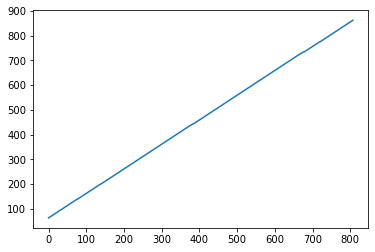

In [10]:
df['Index'].plot()

### `RPC`

These are values of the record in the RPC. Probably should keep.

<AxesSubplot:>

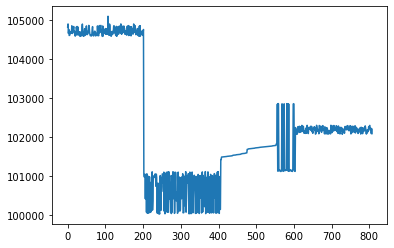

In [11]:
df['RPC'].plot()

### `Source`

This is only 'RPC' for everything. We can probably drop this, unless we plan to merge with another dataset, in which case having the provenance of each record might be good.

In [12]:
df['Source'].unique()

array(['RPC'], dtype=object)

### `YYYY-MM-DD`

These are just strings, with inconsistent formatting. We should convert to proper datetimes. Can do on read?

In [13]:
df['YYYY-MM-DD']

0      Sat 04 May 2002
1      Thu 09 Aug 2012
2           2010-10-26
3      Wed 01 Aug 2007
4           2007-06-30
            ...       
803         2014-10-10
804         2012-01-27
805         2012-09-19
806    Wed 04 Mar 2009
807         2002-08-29
Name: YYYY-MM-DD, Length: 808, dtype: object

In [14]:
type(df['YYYY-MM-DD'][0]), type(df['YYYY-MM-DD'][2])

(str, str)

In [15]:
pd.to_datetime(df['YYYY-MM-DD'])

0     2002-05-04
1     2012-08-09
2     2010-10-26
3     2007-08-01
4     2007-06-30
         ...    
803   2014-10-10
804   2012-01-27
805   2012-09-19
806   2009-03-04
807   2002-08-29
Name: YYYY-MM-DD, Length: 808, dtype: datetime64[ns]

### `Lithology`

Our lithologies. We need to fix the two different values for sandstone.

In [16]:
df['Lithology'].unique()

array(['sandstone', 'SANDST.', 'shale', 'limestone', 'dolomite'],
      dtype=object)

### `DTP`

Recall that we have missing DTP values.

A couple of strange peaks, but apparently there is a null value in here of -999.25.

<AxesSubplot:>

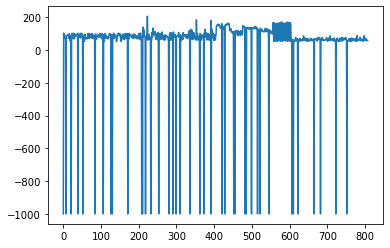

In [20]:
df['DTP [μs/ft]'].plot()

<AxesSubplot:xlabel='DTP [μs/ft]', ylabel='Density'>

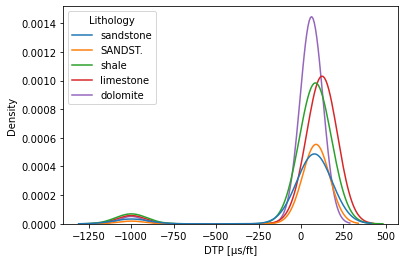

In [21]:
sns.kdeplot(df['DTP [μs/ft]'], hue=df['Lithology'])

👀 Apparently a strange Limestone.

### `Vs`

These look ok, but we should convert to m/s.

<AxesSubplot:>

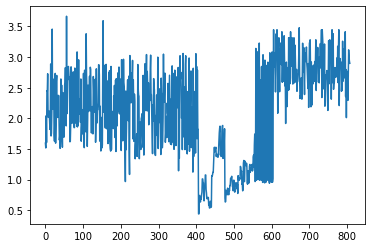

In [22]:
df['Vs [km/s]'].plot()

<AxesSubplot:xlabel='Vs [km/s]', ylabel='Density'>

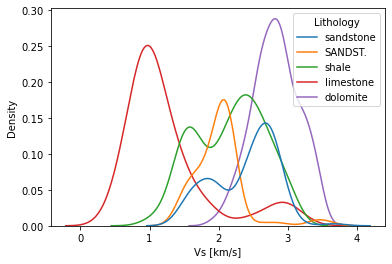

In [23]:
sns.kdeplot(df['Vs [km/s]'], hue=df['Lithology'])

### `VpVs ratio`

Some of these seem very high. Vp is not usually three times faster than Vs?

<AxesSubplot:>

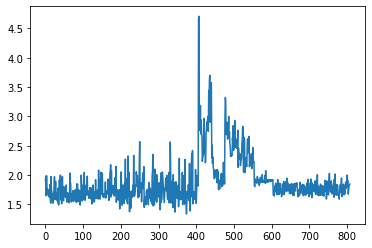

In [24]:
df['VpVs ratio'].plot()

### `Rho`

Recall that we had missing Rho values.

Additionally, the last ~200 values seem to be using the wrong unit and are the wrong order of magnitude.

<AxesSubplot:>

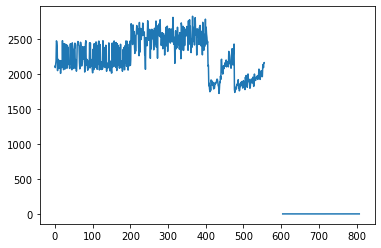

In [25]:
df['Rho [kg/m³]'].plot()

In [26]:
df.tail(10)[['YYYY-MM-DD', 'Description', 'Lithology', 'Rho [kg/m³]']]

,YYYY-MM-DD,Description,Lithology,Rho [kg/m³]
798,Sat 24 Sep 2005,R.PRICE 10921.5 #43,dolomite,2.3540
799,2007-08-20,R.PRICE 10916.5 #38,dolomite,2.3988
800,2001-03-08,R.PRICE 10926.5 #48,dolomite,2.5300
801,2005-07-12,R.PRICE 10928.5 #50,dolomite,2.3161
802,2008-09-24,R.PRICE 10908.5 #30,dolomite,2.4204
803,2014-10-10,R.PRICE 10909.5 #31,dolomite,2.4140
804,2012-01-27,R.PRICE 10916.5 #38,dolomite,2.4757
805,2012-09-19,R.PRICE 10883.5 #7,dolomite,2.5211
806,Wed 04 Mar 2009,R.PRICE 10913.5 #35,dolomite,2.4708
807,2002-08-29,R.PRICE 10883.5 #7,dolomite,2.5492


---

## Fixing these errors<a id='cleaning'></a>

### Dropping the redundant columns<a id='redundant'></a>

In [27]:
df = df.drop(columns=['Index', 'Source'])

### Fixing the dates<a id='dates'></a>

If the dates were important, we could use them as the index, but it is not first-order information in this dataset.

In [28]:
df['YYYY-MM-DD'] = pd.to_datetime(df['YYYY-MM-DD'])
df

,RPC,YYYY-MM-DD,Description,Lithology,DTP [μs/ft],Vs [km/s],VpVs ratio,Rho [kg/m³]
0,104818,2002-05-04,KIAMICHI FORMA. 4,sandstone,-999.2500,1.5957,1.9086,2109.1206
1,104893,2012-08-09,KIAMICHI REMOLD 3,sandstone,101.5797,1.5171,1.9779,2090.3420
2,104652,2010-10-26,NAVAJO ARCO 2,SANDST.,90.6172,2.0415,1.6476,2131.9900
3,104752,2007-08-01,NAVAJO ARCO REMOL 1,SANDST.,95.3901,1.6062,1.9894,2184.9392
4,104598,2007-06-30,FERRON 82-3 1677.5,sandstone,71.9292,2.4486,1.7306,2472.2308
...,...,...,...,...,...,...,...,...
803,102178,2014-10-10,R.PRICE 10909.5 #31,dolomite,65.8887,2.7592,1.6766,2.4140
804,102225,2012-01-27,R.PRICE 10916.5 #38,dolomite,55.9657,3.1168,1.7474,2.4757
805,102088,2012-09-19,R.PRICE 10883.5 #7,dolomite,55.9657,2.9987,1.8162,2.5211
806,102213,2009-03-04,R.PRICE 10913.5 #35,dolomite,56.9957,2.9331,1.8233,2.4708


### Fixing the `Lithology` values<a id='lithology'></a>

In [29]:
df['Lithology'] = df['Lithology'].str.replace('SANDST.', 'sandstone', regex=False)
df['Lithology'].unique()

array(['sandstone', 'shale', 'limestone', 'dolomite'], dtype=object)

In [30]:
# Check if our classes are balanced. This looks decent: ~200 of each lithology.
df.groupby('Lithology').size()

Lithology
dolomite     204
limestone    200
sandstone    202
shale        202
dtype: int64

### Fixing the `Vs` values<a id='vs_values'></a>

Careful not to keep the same column name, which contains the units!

In [31]:
df['Vs [m/s]'] = df['Vs [km/s]'] * 1000
df.describe()

,RPC,DTP [μs/ft],Vs [km/s],VpVs ratio,Rho [kg/m³],Vs [m/s]
count,808.000000,808.000000,808.000000,808.000000,760.000000,808.000000
mean,102277.626238,34.308767,2.116353,1.887390,1656.815643,2116.353465
std,1537.484250,237.790700,0.747915,0.377769,1029.026472,747.914804
min,100031.000000,-999.250000,0.441300,1.337600,2.262200,441.300000
25%,101112.750000,62.703750,1.527225,1.666075,2.666425,1527.225000
50%,102083.500000,80.410850,2.202600,1.779850,2109.104250,2202.600000
75%,103284.750000,99.818225,2.733000,1.943675,2422.384950,2733.000000
max,105090.000000,204.466100,3.665000,4.707800,2823.287700,3665.000000


### Fixing the `Rho` values<a id='rho_values'></a>

<AxesSubplot:>

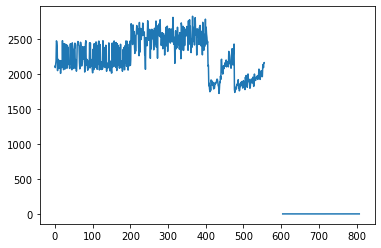

In [32]:
df['Rho [kg/m³]'].plot()

<AxesSubplot:>

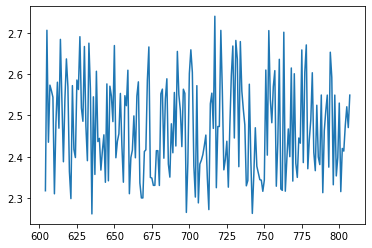

In [33]:
df[df['Rho [kg/m³]'] < 10]['Rho [kg/m³]'].plot()

In [34]:
df[df['Rho [kg/m³]'] < 10]['Lithology'].unique()

array(['dolomite'], dtype=object)

Check the complement does **not** contain dolomite:

In [35]:
df[df['Rho [kg/m³]'] > 10]['Lithology'].unique()

array(['sandstone', 'shale', 'limestone'], dtype=object)

Okay, **all** the dolomite has broken units.

<AxesSubplot:>

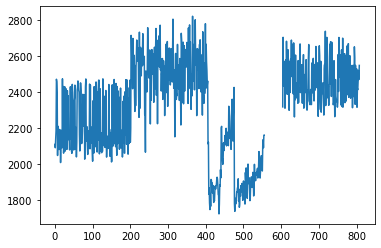

In [36]:
dolomites = df['Lithology'] == 'dolomite'

df.loc[dolomites, 'Rho [kg/m³]'] = df.loc[dolomites, 'Rho [kg/m³]'] * 1000
df['Rho [kg/m³]'].plot()

Notice that big gap.

### Fixing the `NaN` values<a id='nan_values'></a>

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RPC          808 non-null    int64         
 1   YYYY-MM-DD   808 non-null    datetime64[ns]
 2   Description  808 non-null    object        
 3   Lithology    808 non-null    object        
 4   DTP [μs/ft]  808 non-null    float64       
 5   Vs [km/s]    808 non-null    float64       
 6   VpVs ratio   808 non-null    float64       
 7   Rho [kg/m³]  760 non-null    float64       
 8   Vs [m/s]     808 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 56.9+ KB


In [38]:
df['Vp [m/s]'] = df['Vs [m/s]'] * df['VpVs ratio']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RPC          808 non-null    int64         
 1   YYYY-MM-DD   808 non-null    datetime64[ns]
 2   Description  808 non-null    object        
 3   Lithology    808 non-null    object        
 4   DTP [μs/ft]  808 non-null    float64       
 5   Vs [km/s]    808 non-null    float64       
 6   VpVs ratio   808 non-null    float64       
 7   Rho [kg/m³]  760 non-null    float64       
 8   Vs [m/s]     808 non-null    float64       
 9   Vp [m/s]     808 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 63.2+ KB


In [39]:
DTP_est = 1e6 * 0.3048 / df['Vp [m/s]']
pd.DataFrame([df['DTP [μs/ft]'], DTP_est]).T

# Right-hand column is actually DTP_est.

,DTP [μs/ft],Vp [m/s]
0,-999.2500,100.080346
1,101.5797,101.577244
2,90.6172,90.617859
3,95.3901,95.387887
4,71.9292,71.928403
...,...,...
803,65.8887,65.887392
804,55.9657,55.964638
805,55.9657,55.965227
806,56.9957,56.994108


<AxesSubplot:>

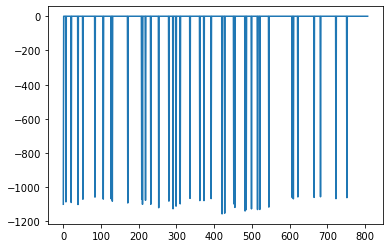

In [40]:
(df['DTP [μs/ft]'] - DTP_est).plot()

Seems to be a reasonable estimate, let's just keep Vp and drop VpVs and DTP.

In [41]:
df = df.drop(columns=['Vs [km/s]', 'VpVs ratio', 'DTP [μs/ft]'])

### Check for duplicate values<a id='duplicates'></a>

We will only keep one of them, by default the first.

In [42]:
df.loc[df.duplicated(keep=False)] # keep=False shows all matching records.

,RPC,YYYY-MM-DD,Description,Lithology,Rho [kg/m³],Vs [m/s],Vp [m/s]
76,104646,2005-12-14,NAVAJO ARCO 2,sandstone,2210.1729,1848.9,3069.54378
77,104646,2005-12-14,NAVAJO ARCO 2,sandstone,2210.1729,1848.9,3069.54378
138,104703,2006-03-19,NAVAJO ARCO 3,sandstone,2096.4860,2142.6,3740.76534
139,104703,2006-03-19,NAVAJO ARCO 3,sandstone,2096.4860,2142.6,3740.76534
377,100066,2004-12-08,Hard shale,shale,2642.6244,2426.7,3902.37627
378,100066,2004-12-08,Hard shale,shale,2642.6244,2426.7,3902.37627
383,101009,2001-06-24,Gray Shale,shale,2664.8891,2207.0,3067.50930
384,101009,2001-06-24,Gray Shale,shale,2664.8891,2207.0,3067.50930
668,102283,2010-03-19,R.PRICE 10928.5 #50,dolomite,2300.8000,2605.0,4461.84400
669,102283,2010-03-19,R.PRICE 10928.5 #50,dolomite,2300.8000,2605.0,4461.84400


In [43]:
df = df.loc[~df.duplicated(keep='first')]

There's also `df.drop_duplicates()`.

### Dropping `NaN` values

We still have NaNs in `Rho`:

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 807
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RPC          800 non-null    int64         
 1   YYYY-MM-DD   800 non-null    datetime64[ns]
 2   Description  800 non-null    object        
 3   Lithology    800 non-null    object        
 4   Rho [kg/m³]  752 non-null    float64       
 5   Vs [m/s]     800 non-null    float64       
 6   Vp [m/s]     800 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 50.0+ KB


In [45]:
df = df.dropna()

### Renaming columns<a id='renaming'></a>

In [46]:
df.columns

Index(['RPC', 'YYYY-MM-DD', 'Description', 'Lithology', 'Rho [kg/m³]',
       'Vs [m/s]', 'Vp [m/s]'],
      dtype='object')

In [47]:
df.rename(columns={'YYYY-MM-DD': 'Date'}, inplace=True)

We may want to deal with the units in the column names. One way of doing this is with a `MultiIndex`. First we get a list of tuples of the header name and its unit, if any:

In [54]:
names = [c.split() if ' ' in c else (c, '') for c in df.columns]
names

[('RPC', ''),
 ('Date', ''),
 ('Description', ''),
 ('Lithology', ''),
 ['Rho', '[kg/m³]'],
 ['Vs', '[m/s]'],
 ['Vp', '[m/s]']]

In [55]:
# the `MultiIndex.from_tuples` method will let us rename our columns:
pd.MultiIndex.from_tuples(names)

MultiIndex([(        'RPC',        ''),
            (       'Date',        ''),
            ('Description',        ''),
            (  'Lithology',        ''),
            (        'Rho', '[kg/m³]'),
            (         'Vs',   '[m/s]'),
            (         'Vp',   '[m/s]')],
           )

In [56]:
df.columns = pd.MultiIndex.from_tuples(names)
df

,RPC,Date,Description,Lithology,Rho,Vs,Vp
,,,,,[kg/m³],[m/s],[m/s]
0,104818,2002-05-04,KIAMICHI FORMA. 4,sandstone,2109.1206,1595.7,3045.55302
1,104893,2012-08-09,KIAMICHI REMOLD 3,sandstone,2090.3420,1517.1,3000.67209
2,104652,2010-10-26,NAVAJO ARCO 2,sandstone,2131.9900,2041.5,3363.57540
3,104752,2007-08-01,NAVAJO ARCO REMOL 1,sandstone,2184.9392,1606.2,3195.37428
4,104598,2007-06-30,FERRON 82-3 1677.5,sandstone,2472.2308,2448.6,4237.54716
...,...,...,...,...,...,...,...
803,102178,2014-10-10,R.PRICE 10909.5 #31,dolomite,2414.0000,2759.2,4626.07472
804,102225,2012-01-27,R.PRICE 10916.5 #38,dolomite,2475.7000,3116.8,5446.29632
805,102088,2012-09-19,R.PRICE 10883.5 #7,dolomite,2521.1000,2998.7,5446.23894


In [57]:
df.reset_index(drop=True, inplace=True)
df

,RPC,Date,Description,Lithology,Rho,Vs,Vp
,,,,,[kg/m³],[m/s],[m/s]
0,104818,2002-05-04,KIAMICHI FORMA. 4,sandstone,2109.1206,1595.7,3045.55302
1,104893,2012-08-09,KIAMICHI REMOLD 3,sandstone,2090.3420,1517.1,3000.67209
2,104652,2010-10-26,NAVAJO ARCO 2,sandstone,2131.9900,2041.5,3363.57540
3,104752,2007-08-01,NAVAJO ARCO REMOL 1,sandstone,2184.9392,1606.2,3195.37428
4,104598,2007-06-30,FERRON 82-3 1677.5,sandstone,2472.2308,2448.6,4237.54716
...,...,...,...,...,...,...,...
747,102178,2014-10-10,R.PRICE 10909.5 #31,dolomite,2414.0000,2759.2,4626.07472
748,102225,2012-01-27,R.PRICE 10916.5 #38,dolomite,2475.7000,3116.8,5446.29632
749,102088,2012-09-19,R.PRICE 10883.5 #7,dolomite,2521.1000,2998.7,5446.23894


## Writing all this as 'chained' methods on the DataFrame

If you have been writing everything as functions so far, good decision!

If not, here you go:

In [3]:
def fix_dates(df):
    """Transform date-likes to datetime objects."""
    # Fix then rename avoids adding new column and changing order.
    df['YYYY-MM-DD'] = pd.to_datetime(df['YYYY-MM-DD'])
    df = df.rename(columns={'YYYY-MM-DD': 'Date'})
    return df

def fix_lithology(df):
    """Combine lithologies."""
    df['Lithology'] = df['Lithology'].str.replace('SANDST.', 'sandstone', regex=False)
    return df

def fix_numeric(df):
    """Fix various numerical issues."""
    # Vs.
    df['Vs [m/s]'] = df['Vs [km/s]'] * 1000
    # Rho for dolomites.
    dolomites = df['Lithology'] == 'dolomite'
    df.loc[dolomites, 'Rho [kg/m³]'] = df.loc[dolomites, 'Rho [kg/m³]'] * 1000
    # Vp.
    df['Vp [m/s]'] = df['Vs [m/s]'] * df['VpVs ratio']
    return df

def split_units(df):
    """Split units from column names."""
    pairs = [c.split() if ' ' in c else (c, '') for c in df.columns]
    df.columns = pd.MultiIndex.from_tuples(pairs)
    return df

Now we can do:

In [4]:
url = 'https://geocomp.s3.amazonaws.com/data/RPC_4_lithologies_Messy.csv'

df = (pd.read_csv(url)
        .drop(columns=['Index', 'Source'])
        .pipe(fix_dates)
        .pipe(fix_lithology)
        .pipe(fix_numeric)
        .drop(columns=['Vs [km/s]', 'VpVs ratio', 'DTP [μs/ft]'])
        .drop_duplicates(keep='first')
        .dropna(axis=0)
        .pipe(split_units)
        .reset_index()
     )

df

,index,RPC,Date,Description,Lithology,Rho,Vs,Vp
,,,,,,[kg/m³],[m/s],[m/s]
0,0,104818,2002-05-04,KIAMICHI FORMA. 4,sandstone,2109.1206,1595.7,3045.55302
1,1,104893,2012-08-09,KIAMICHI REMOLD 3,sandstone,2090.3420,1517.1,3000.67209
2,2,104652,2010-10-26,NAVAJO ARCO 2,sandstone,2131.9900,2041.5,3363.57540
3,3,104752,2007-08-01,NAVAJO ARCO REMOL 1,sandstone,2184.9392,1606.2,3195.37428
4,4,104598,2007-06-30,FERRON 82-3 1677.5,sandstone,2472.2308,2448.6,4237.54716
...,...,...,...,...,...,...,...,...
747,803,102178,2014-10-10,R.PRICE 10909.5 #31,dolomite,2414.0000,2759.2,4626.07472
748,804,102225,2012-01-27,R.PRICE 10916.5 #38,dolomite,2475.7000,3116.8,5446.29632
749,805,102088,2012-09-19,R.PRICE 10883.5 #7,dolomite,2521.1000,2998.7,5446.23894


In [5]:
df.columns

MultiIndex([(      'index',        ''),
            (        'RPC',        ''),
            (       'Date',        ''),
            ('Description',        ''),
            (  'Lithology',        ''),
            (        'Rho', '[kg/m³]'),
            (         'Vs',   '[m/s]'),
            (         'Vp',   '[m/s]')],
           )

---

## Next steps:<a id='next'></a>

* We should move the functionality of this notebook into functions - and then a script - so that we can easily load our RPC data as part of our machine learning pipeline.
* Ensure that the features that we have are ones that we want to use (can we - or do we need to - construct more features, like we did with `Vp`?).
* We may want to remove columns that have redundant data (we have both `Vs [m/s]` and `Vs [km/s]`, for example, but maybe one is enough).
* Do we have other data of this type (lithology, Vp, Vs, rho) from another source that we might want to combine with this one? If so, we should ensure column headers and units are consistent between the two sources.
* Potentially we can make the relevant columns unit aware using `pint` or something similar: https://pint.readthedocs.io/en/0.10.1/pint-pandas.html
* Add guidelines for using our script to the information at the start of the notebook.